In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('gold_monthly_csv.csv')

In [20]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [21]:
df.shape

(847, 2)

In [22]:
print(f"Date Range ogf gold prices avaiblable from -  {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date Range ogf gold prices avaiblable from -  1950-01 to 2020-07


In [23]:
date=pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')

In [24]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [25]:
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [26]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


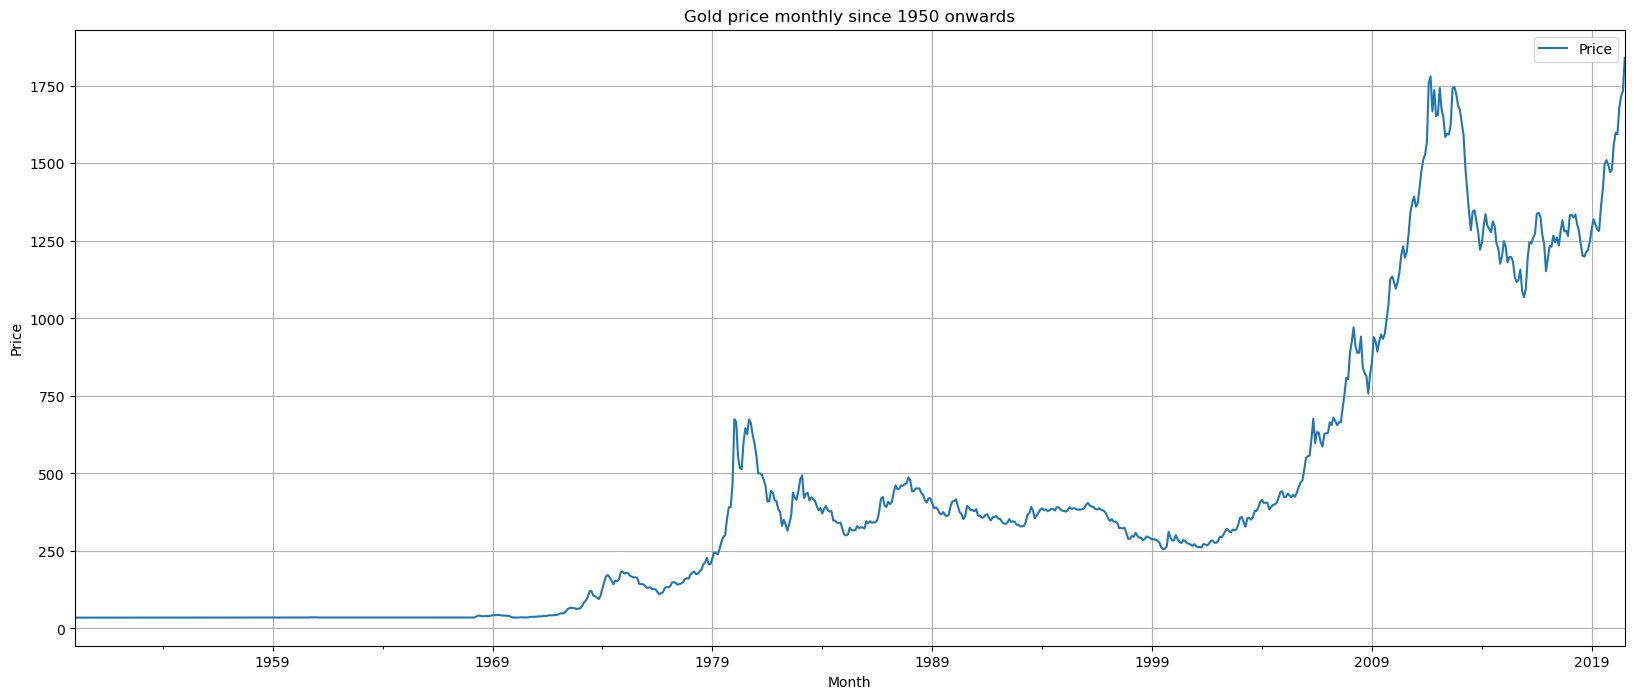

In [27]:
df.plot(figsize=(20,8))
plt.title('Gold price monthly since 1950 onwards')
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid();

In [28]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


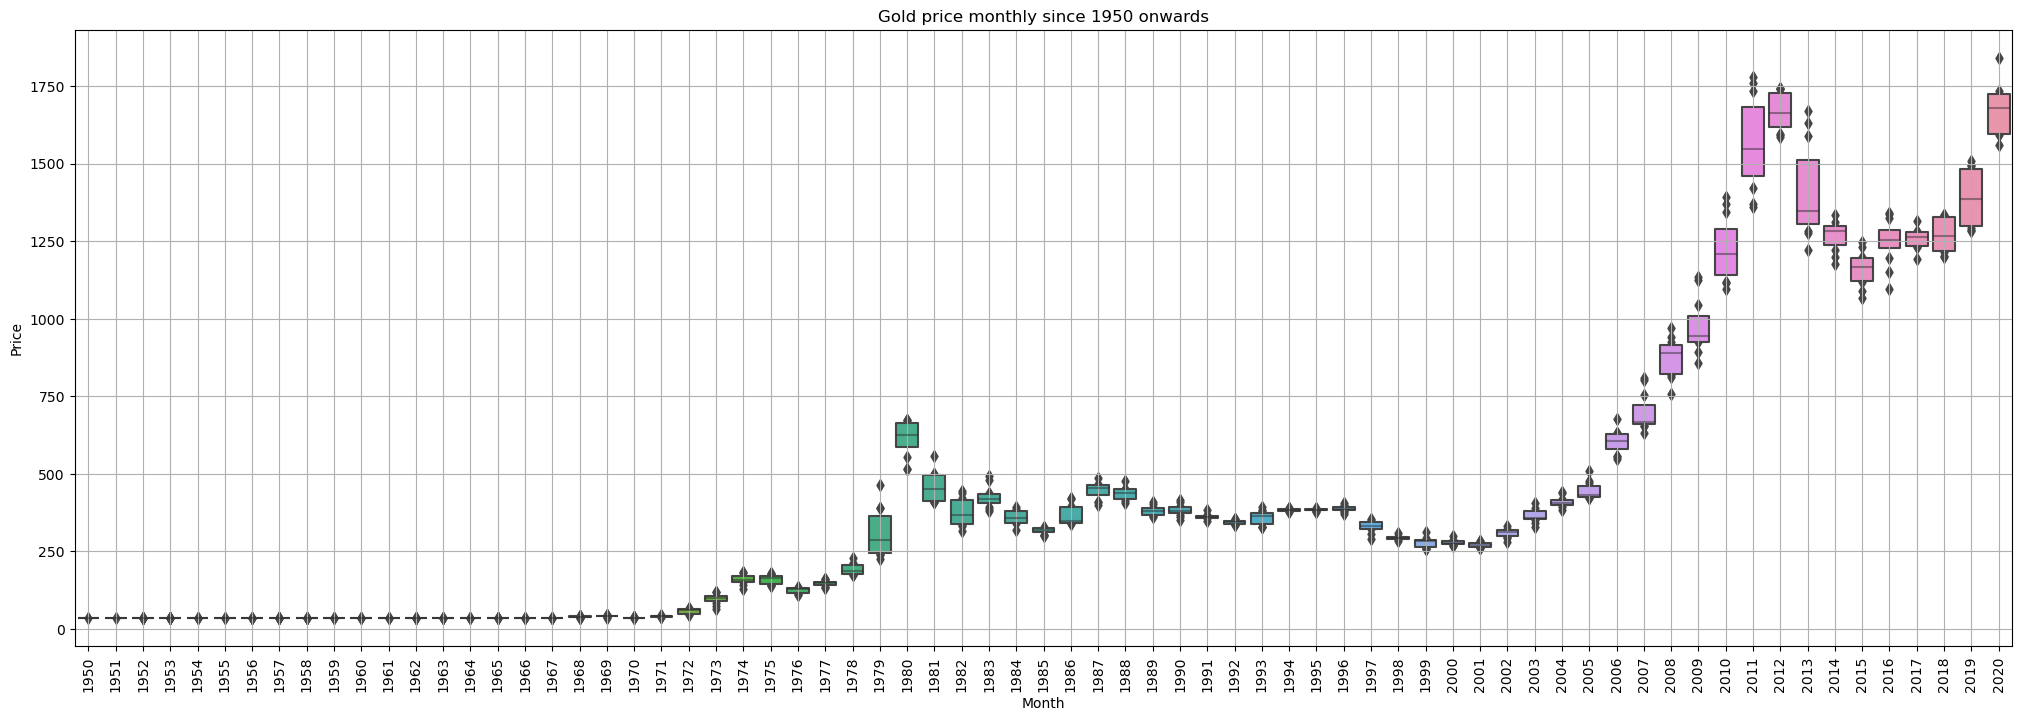

In [30]:
_, ax=plt.subplots(figsize=(25,8))
sns.boxenplot(x = df.index.year,y=df.values[: ,0],ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();

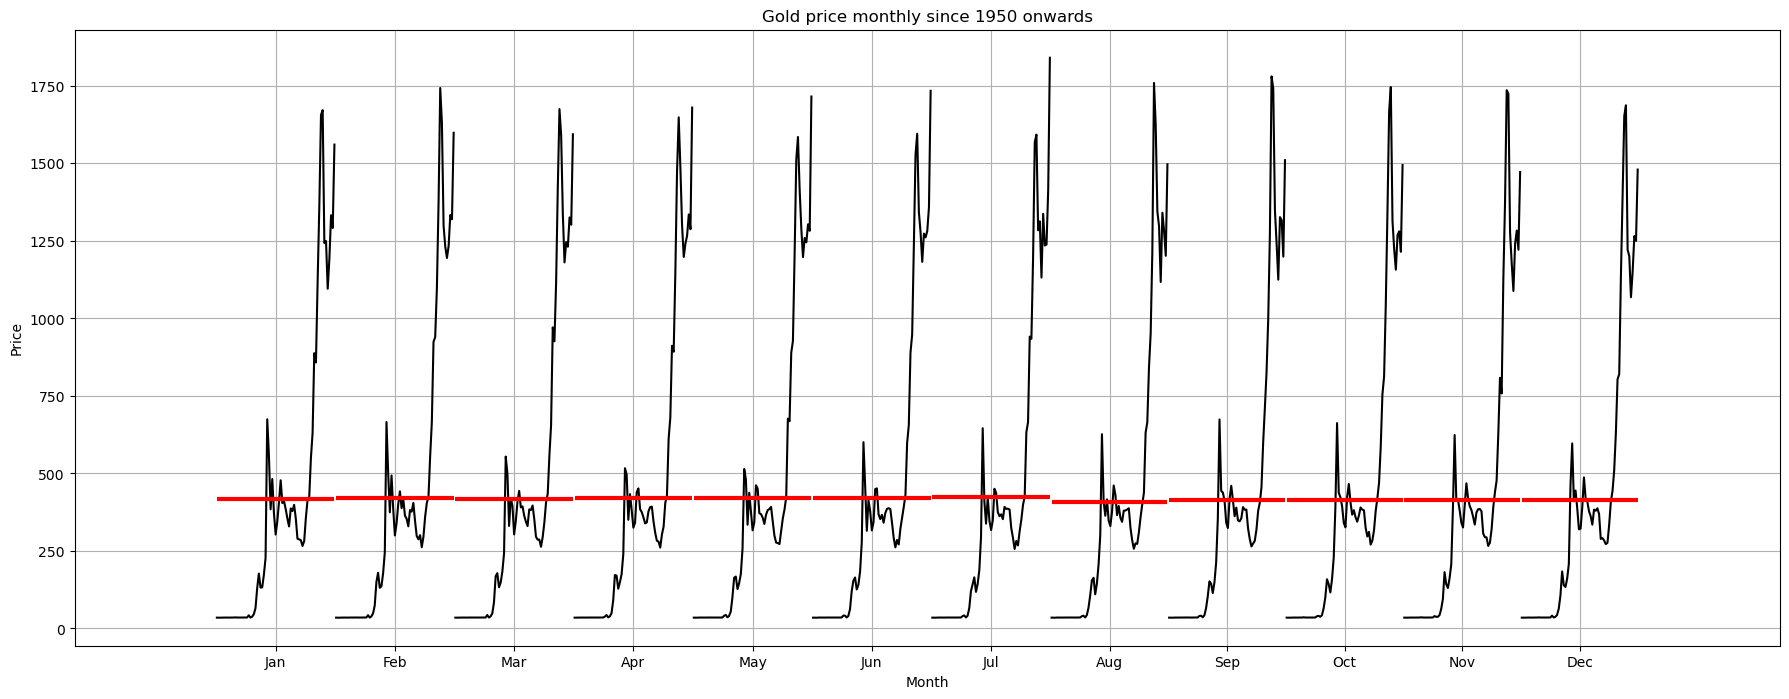

In [32]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel="Gold Price",ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid();

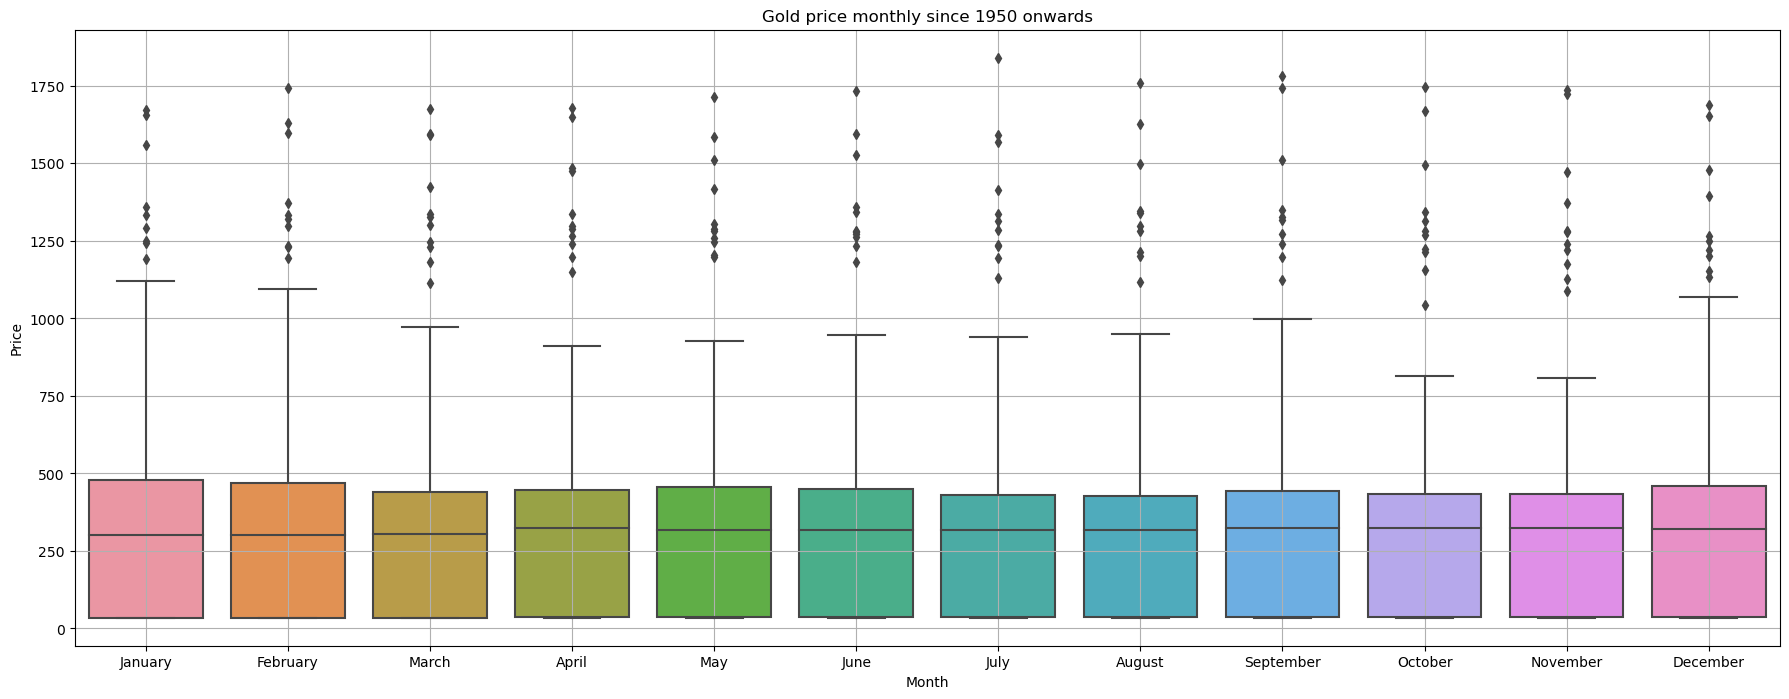

In [35]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df.index.month_name(), y=df.values[:, 0], ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()

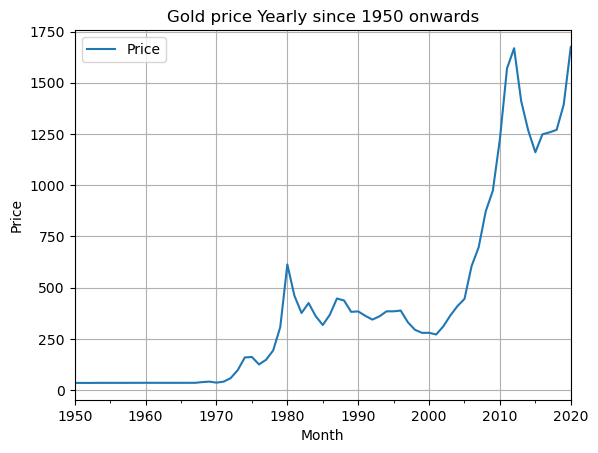

In [39]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Gold price Yearly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid();


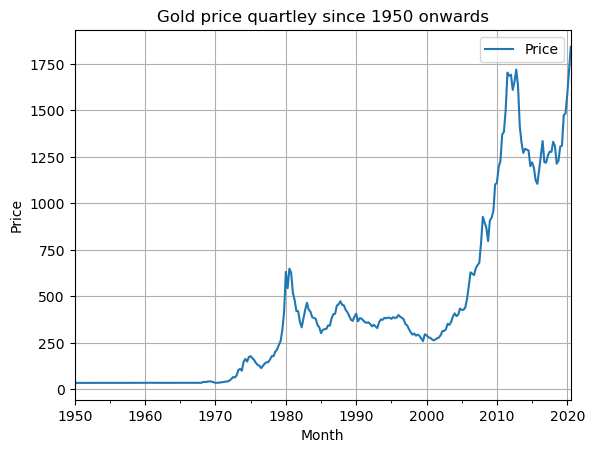

In [40]:
df_quartely_sum=df.resample('Q').mean()
df_quartely_sum.plot()
plt.title("Gold price quartley since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid();

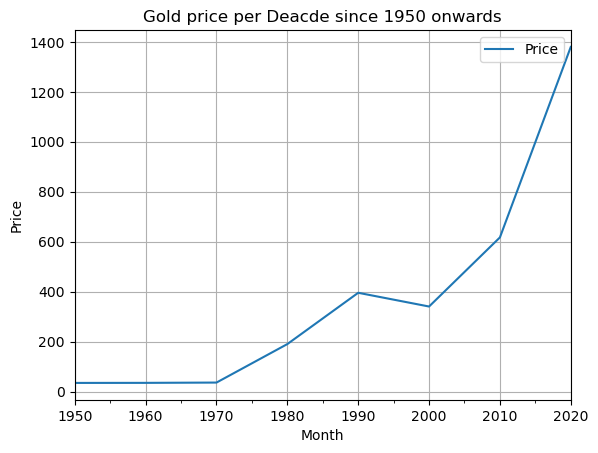

In [44]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Gold price per Deacde since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid();

In [47]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['Cov_pct']=((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


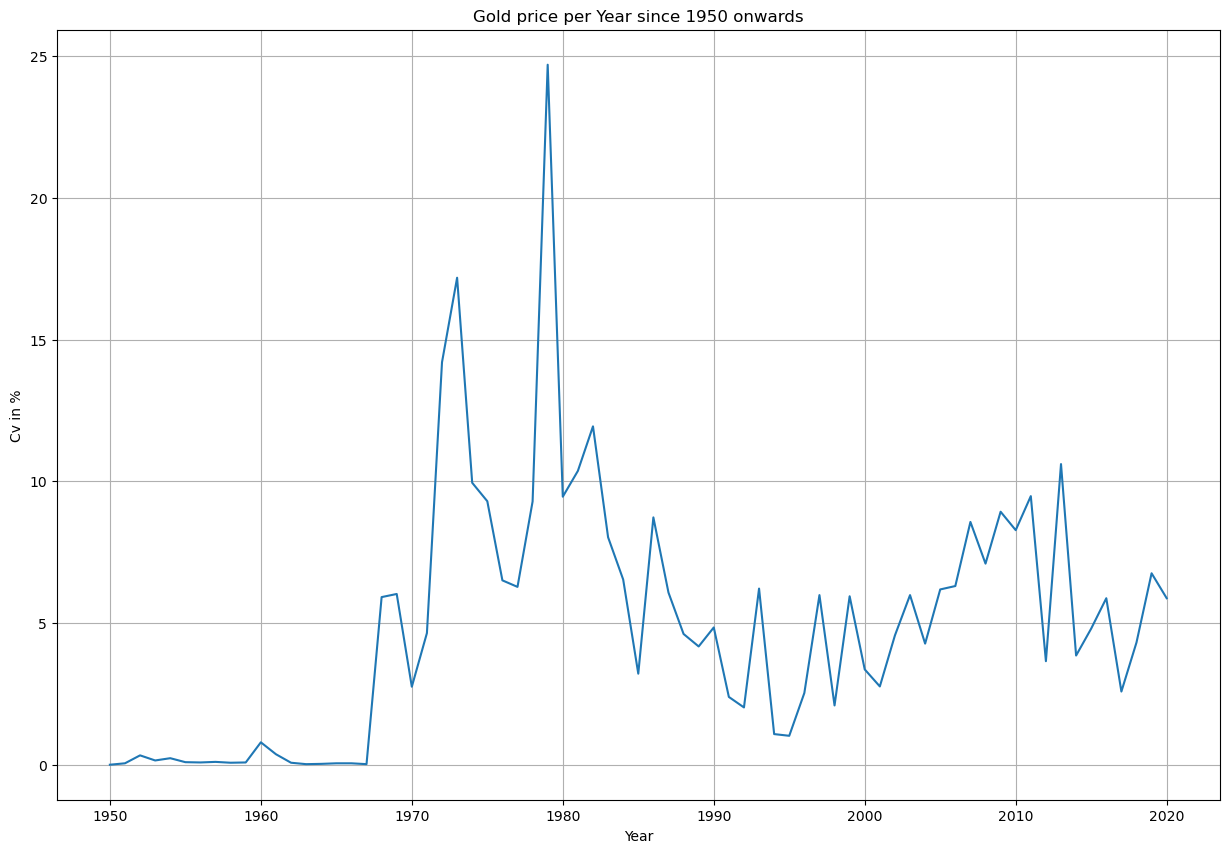

In [50]:
fig, ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title("Gold price per Year since 1950 onwards")
plt.xlabel("Year")
plt.ylabel("Cv in %")
plt.grid();

In [51]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]

In [53]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


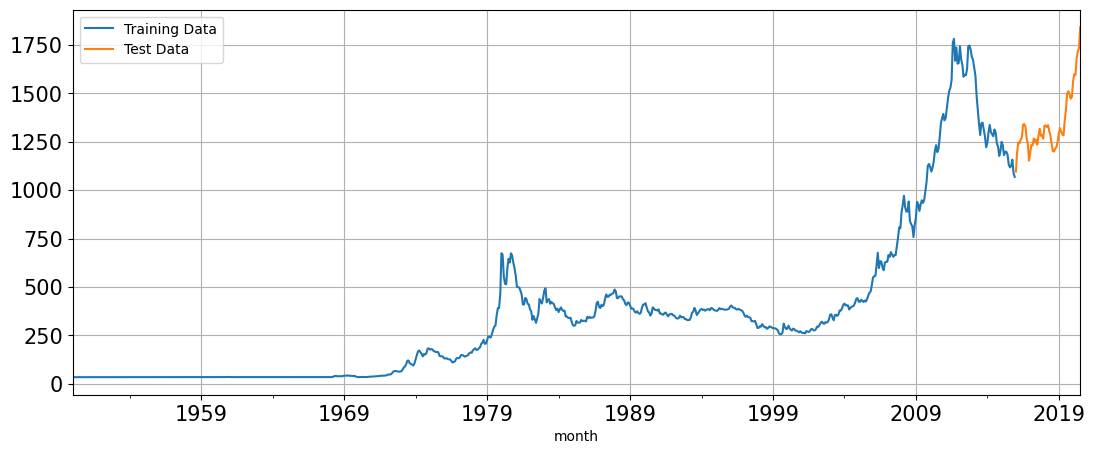

In [55]:
train["Price"].plot(figsize=(13,5),fontsize=15)
test["Price"].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(["Training Data","Test Data"])
plt.show()

In [56]:
train_time=[i+1 for  i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [57]:
LR_train = train.copy()
LR_test =test.copy()

In [58]:
LR_train['time'] = train_time
LR_test['time']=test_time

In [59]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)


LinearRegression()

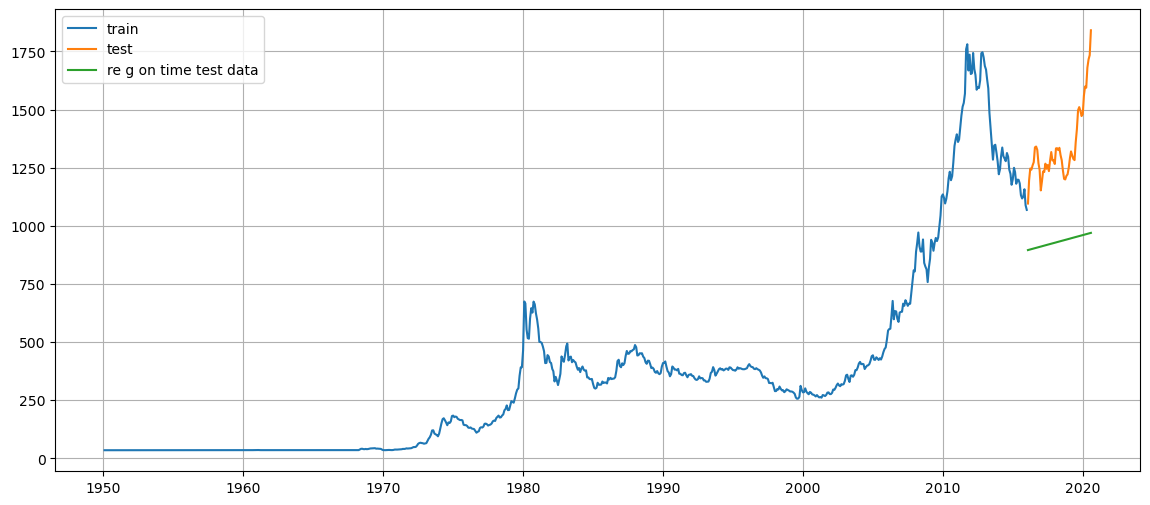

In [74]:
test_prediction_model1=lr.predict(LR_test[['time']])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'],label='train')
plt.plot(test["Price"],label='test')
plt.plot(LR_test['forecast'],label='re g on time test data')
plt.legend(loc='best')
plt.grid();

In [75]:
 def mape(actual,pred):
        return round((np.mean(abs(actual-pred)/actual))*100,2)

In [79]:
mape_model1_test=mape(test['Price'].values,test_prediction_model1)
# print("Mape is %3.3f",5(mape_model1_test),"%")
print("Mape is %3.3f" % (mape_model1_test), "%")

Mape is 29.760 %


In [80]:
results=pd.DataFrame({'Test Mape(%)' : [mape_model1_test]},index=["RegerssionOnTime"])
results
                      

,Test Mape(%)
RegerssionOnTime,29.76


In [81]:
 final_model=ExponentialSmoothing(df,
                                 trend='additive',
                                 seasonal='additive').fit(smoothing_level=0.4,
                                                         smoothing_trend=0.3,
                                                         smoothing_seasonal=0.6)

In [84]:
Mape_final_model=mape(df['Price'].values,final_model.fittedvalues)
print(":MAPE",Mape_final_model)

:MAPE 17.24


In [85]:
predictions=final_model.forecast(steps=len(test))

In [89]:
pred_df=pd.DataFrame({'lower_CI':predictions - 1.96*np.std(final_model.resid,ddof=1),
                    'prediction':predictions,
                    'upper_CI':predictions+ 1.96*np.std(final_model.resid,ddof =1)})

In [90]:
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


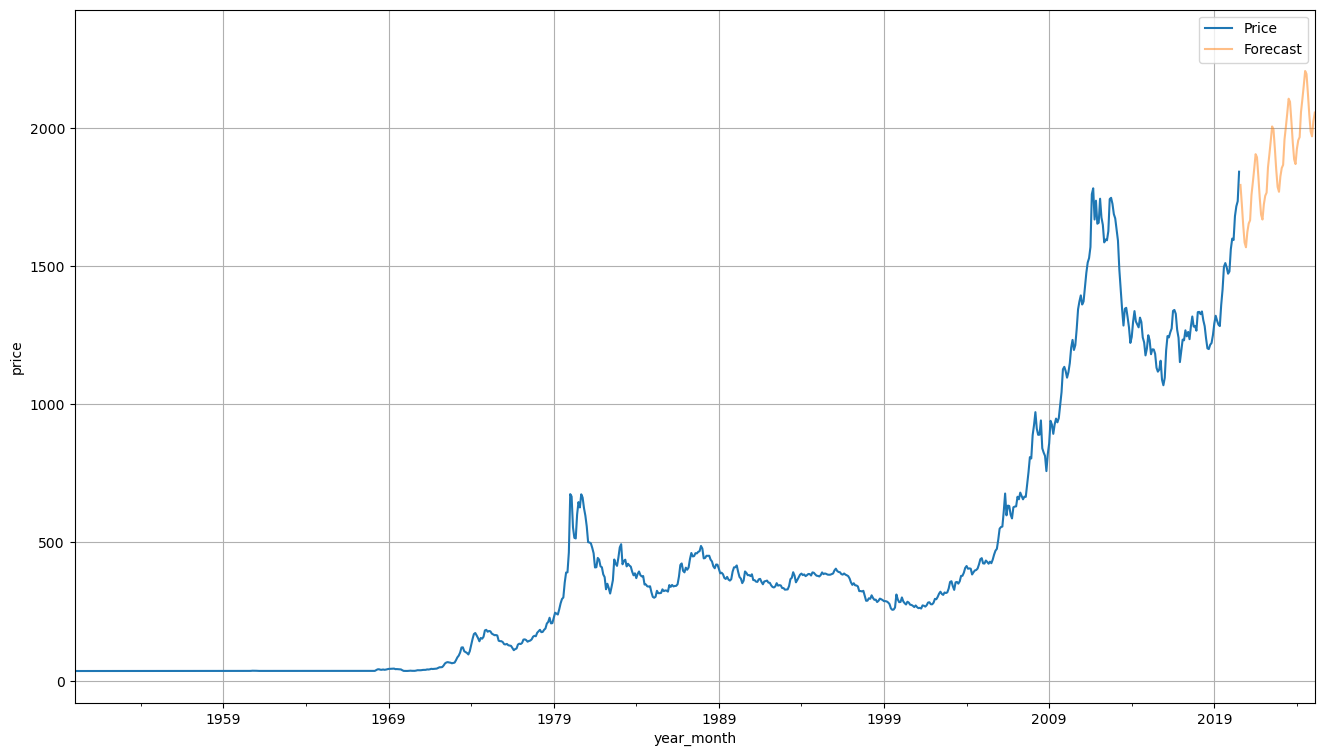

In [98]:
axis = df.plot(label='Actual', figsize=(16, 9))  
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['upper_CI'], pred_df['lower_CI'], color='m', alpha=0.15)  # Corrected fill_between arguments
axis.set_xlabel('year_month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()
